1. Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


2. Load and Prepare the Dataset

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, 0].reshape(-1, 1)  # Use the first feature
y = iris.data[:, 1]  # Use the second feature as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


3. Initialize Parameters

In [3]:
def initialize_weights(dim):
    weights = np.zeros(dim)
    bias = 0
    return weights, bias


4. Define the Linear Model

In [4]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias


5. Compute the Loss

In [5]:
def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return loss


6. Compute Gradients

In [6]:
def compute_gradients(X, y_true, y_pred):
    m = len(y_true)
    dw = (1 / m) * np.dot(X.T, (y_pred - y_true))
    db = (1 / m) * np.sum(y_pred - y_true)
    return dw, db


7. Update Parameters

In [7]:
def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias


8. Train the Linear Regression Model

In [8]:
def train_linear_regression(X, y, learning_rate, epochs):
    weights, bias = initialize_weights(X.shape[1])
    for i in range(epochs):
        # Make predictions
        y_pred = predict(X, weights, bias)

        # Compute loss
        loss = compute_loss(y, y_pred)

        # Compute gradients
        dw, db = compute_gradients(X, y, y_pred)

        # Update parameters
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")
    return weights, bias


9. Train the Model

In [9]:
learning_rate = 0.01
epochs = 1000
weights, bias = train_linear_regression(X_train, y_train, learning_rate, epochs)


Epoch 0: Loss = 4.7869
Epoch 100: Loss = 0.7270
Epoch 200: Loss = 0.1830
Epoch 300: Loss = 0.1101
Epoch 400: Loss = 0.1004
Epoch 500: Loss = 0.0991
Epoch 600: Loss = 0.0989
Epoch 700: Loss = 0.0989
Epoch 800: Loss = 0.0989
Epoch 900: Loss = 0.0989


10. Evaluate the Model

In [10]:
def evaluate_model(X, y, weights, bias):
    y_pred = predict(X, weights, bias)
    mse = compute_loss(y, y_pred)
    return mse

mse_test = evaluate_model(X_test, y_test, weights, bias)
print(f"Test MSE: {mse_test:.4f}")


Test MSE: 0.0698


11. Visualize the Regression Line

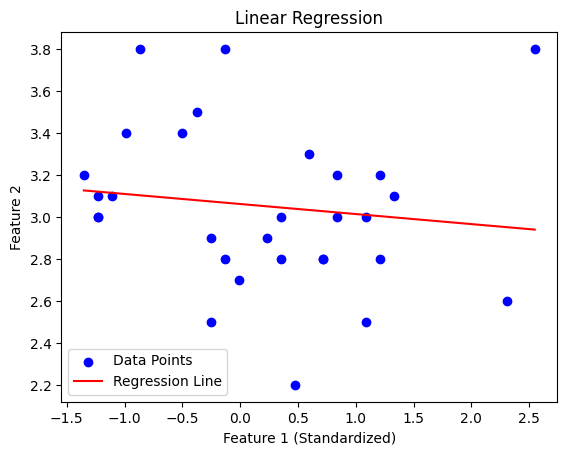

In [ ]:
def plot_regression_line(X, y, weights, bias):
    plt.scatter(X, y, color='blue', label='Data Points')
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = predict(x_range, weights, bias)
    plt.plot(x_range, y_range, color='red', label='Regression Line')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

plot_regression_line(X_test, y_test, weights, bias)
